In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
np.set_printoptions(linewidth=np.inf)

2025-07-29 22:05:35.568821: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-29 22:05:35.573758: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-29 22:05:35.587667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753806935.611148   12148 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753806935.619222   12148 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753806935.638778   12148 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
#load the data
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(x_test.shape)   # (10000, 28, 28)
print(y_test.shape)   # (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
print(x_train[7])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253 253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252 252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252 252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 132 132 189 252 25

In [5]:
print(y_train[7])

3


In [6]:
# Normalize the images to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the 28x28 images to 784 vectors

Why flatten?

- Dense layers expect 1D input per example not 2D.
- Flattening helps the data flow into the model correctly.

In [7]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

In [8]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.       

In [9]:
print("Training shape:", x_train.shape)
print("Test shape:", x_test.shape)

Training shape: (60000, 784)
Test shape: (10000, 784)


In [10]:
model = Sequential([
    Dense(units=128 , activation='relu'),
    Dense(units=64 , activation='relu'),
    Dense(units=10 , activation='linear')
])    

In [11]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

2025-07-29 22:05:39.102516: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
model.fit(x_train, y_train, epochs=7, batch_size=32, validation_split=0.1)

Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8681 - loss: 0.4444 - val_accuracy: 0.9673 - val_loss: 0.1060
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9640 - loss: 0.1162 - val_accuracy: 0.9710 - val_loss: 0.0959
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.0742 - val_accuracy: 0.9748 - val_loss: 0.0798
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9830 - loss: 0.0537 - val_accuracy: 0.9765 - val_loss: 0.0740
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9873 - loss: 0.0405 - val_accuracy: 0.9773 - val_loss: 0.0753
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9892 - loss: 0.0329 - val_accuracy: 0.9772 - val_loss: 0.0839
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0287 - val_accuracy: 0.9772 - val_loss: 0.0827


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.1130
Test Accuracy: 0.9758999943733215


In [14]:
index = 0
sample = x_test[index].reshape(1, -1)  # shape becomes (1, 784)
true_label = y_test[index]
logits = model(sample)
print("Logits:", logits.numpy())

# the model() returns logits (raw outputs),
# but during training (fit) and evaluation (evaluate), TensorFlow applies softmax + loss automatically because you told it to do so with:

Logits: [[ -6.793573    -3.8141954   -0.04700051   1.9642104  -10.716895    -8.274161   -13.630347    16.11887     -8.071411     0.6696976 ]]


In [15]:
# Manually apply softmax
probs = tf.nn.softmax(logits).numpy()
predicted_class = np.argmax(probs)  #This just finds the index of the largest probability

In [16]:
print(f"True label: {true_label}")
print(f"Predicted class: {predicted_class}")
print(f"Softmax probabilities: {probs}")

True label: 7
Predicted class: 7
Softmax probabilities: [[1.1200874e-10 2.2038358e-09 9.5334727e-08 7.1237577e-07 2.2150038e-12 2.5482399e-11 1.2024812e-13 9.9999893e-01 3.1210017e-11 1.9521329e-07]]


True label: 7


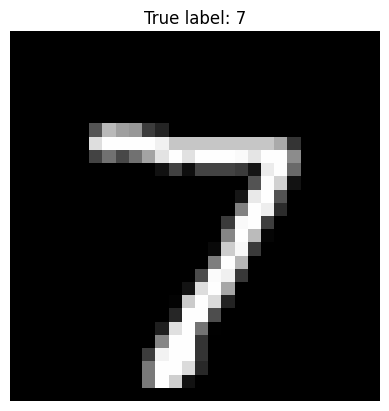

In [17]:
import matplotlib.pyplot as plt

# The index i used
index = 0

# Showing the actual label
print("True label:", y_test[index])

# Showing the image
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"True label: {y_test[index]}")
plt.axis('off')
plt.show()
